In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [7]:
import keras
keras.__version__
#from tf.keras.models import Sequential  # This does not work!
#import PIL
#from PIL import Image, ImageOps
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam, RMSprop

In [2]:
train_dir = 'data/Knifey_Spoony/train'
validation_dir = 'data/Knifey_Spoony/validation'
image_size = 224

## Experiment 1: Freezing all layers - Same as Transfer Learning
Create the model

In [3]:
"""
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()
"""

"\nfrom keras.applications import VGG16\n\n#Load the VGG model\nvgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))\n\n# Freeze all the layers\nfor layer in vgg_conv.layers[:]:\n    layer.trainable = False\n\n# Check the trainable status of the individual layers\nfor layer in vgg_conv.layers:\n    print(layer, layer.trainable)\n\n\nfrom keras import models\nfrom keras import layers\nfrom keras import optimizers\n\n# Create the model\nmodel = models.Sequential()\n\n# Add the vgg convolutional base model\nmodel.add(vgg_conv)\n\n# Add new layers\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(1024, activation='relu'))\nmodel.add(layers.Dropout(0.5))\nmodel.add(layers.Dense(3, activation='softmax'))\n\n# Show a summary of the model. Check the number of trainable parameters\nmodel.summary()\n"

In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

## Experiment 1
Train the model

Found 1127 images belonging to 3 classes.
Found 79 images belonging to 3 classes.
Epoch 1/20
12/11 [===============================] - 299s 25s/step - loss: 1.0836 - acc: 0.4148 - val_loss: 1.2311 - val_acc: 0.3418ETA: 5:50 - loss: 1.1107 - a
Epoch 2/20
12/11 [===============================] - 153s 13s/step - loss: 1.0574 - acc: 0.4466 - val_loss: 1.2078 - val_acc: 0.3418
Epoch 3/20
12/11 [===============================] - 141s 12s/step - loss: 1.0306 - acc: 0.4542 - val_loss: 1.1687 - val_acc: 0.3291
Epoch 4/20
12/11 [===============================] - 140s 12s/step - loss: 0.9806 - acc: 0.5153 - val_loss: 1.2604 - val_acc: 0.3671
Epoch 5/20
12/11 [===============================] - 144s 12s/step - loss: 0.9471 - acc: 0.5437 - val_loss: 1.0642 - val_acc: 0.4177
Epoch 6/20
12/11 [===============================] - 134s 11s/step - loss: 0.8855 - acc: 0.5948 - val_loss: 1.4281 - val_acc: 0.3165
Epoch 7/20
12/11 [===============================] - 132s 11s/step - loss: 0.8684 - acc: 0.5

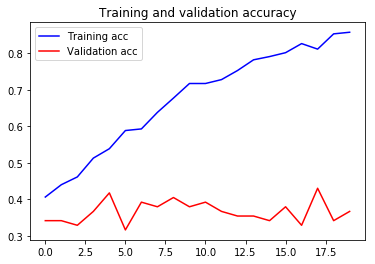

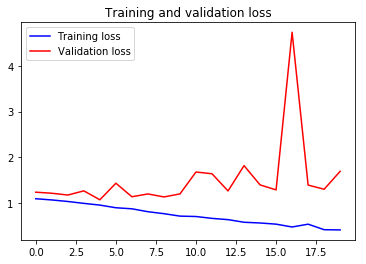

In [12]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [59]:
from keras.models import model_from_json
# Save model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("models/color_tensorflow_real_mode_2_imgs.h5")

##### Load the model

with open('model.json','r') as f:
    json = f.read()
model = model_from_json(json)

model.load_weights("models/color_tensorflow_real_mode_2_imgs.h5")

In [61]:
image_path='data/Knifey_Spoony/predicted/knifey-test-01-0005.jpg'

In [62]:
model.predict(image_path)

AttributeError: 'str' object has no attribute 'ndim'

## Prediction

In [39]:

# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
# Get the filenames from the generator
#fnames = validation_generator.filenames

# Get the ground truth from generator
#ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
#label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
#idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
#predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
#predicted_classes = np.argmax(predictions,axis=1)

Found 79 images belonging to 3 classes.


In [45]:
def decode_predictions(pred):
    class_name = classes
    class_description = class_names
    score = []
    
    return (class_name, class_description, score)

In [46]:
import PIL
def predict(image_path):
    # Load and resize the image using PIL.
    img = PIL.Image.open(image_path)
    input_shape = (224, 224)
    img_resized = img.resize(input_shape, PIL.Image.LANCZOS)

    # Plot the image.
    plt.imshow(img_resized)
    plt.show()

    # Convert the PIL image to a numpy-array with the proper shape.
    img_array = np.expand_dims(np.array(img_resized), axis=0)

    # Use the VGG16 model to make a prediction.
    # This outputs an array with 1000 numbers corresponding to
    # the classes of the ImageNet-dataset.
    pred = model.predict(img_array) 
    # Decode the output of the VGG16 model
    pred_decoded = decode_prediction(pred)[0]
    #pred_decoded = idx2label(pred)[0]
    #pred_decoded = classes(pred)[0]

    # Print the predictions.
    #for code, name, score in pred:
    print(pred)
        


In [47]:
def decode_predictions(pred):
    class_name = classes
    class_description = class_names
    score = []
    
    return (class_name, class_description, score)

In [167]:
import cv2
img = cv2.imread('data/Knifey_Spoony/predicted/knifey-test-01-0005.jpg')
y = cv2.resize(img, (224, 224 )) 
imgs = np.expand_dims(y, axis=0)

In [220]:
preds = model.predict(imgs)
for cls in train_generator.class_indices:
    #print(cls+": "+str(preds[0][train_generator.class_indices[cls]])) 
    x = preds[0][train_generator.class_indices[cls]] 
    x = "{:.1%}".format(x)
    p = cls+": "+ x
    #print (x)
    print (p)
    #print (cls+": "+ x)  
    #print ("{0:>0.2} : {1}".format(9))
for code, p, x in preds:
        print("{0:>6.2%} : {1}".format(p, x))


forky: 0.0%
knifey: 0.1%
spoony: 99.9%
 0.09% : 0.9990944862365723


In [ ]:
"{:.1%}".format(0.88)

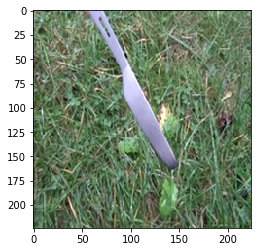

NameError: name 'decode_prediction' is not defined

In [48]:
predict(image_path='data/Knifey_Spoony/predicted/knifey-test-01-0005.jpg')

In [53]:
def testTHPrediction(self):
        keras.backend.set_image_dim_ordering('th')
        model = SqueezeNet()
        img = image.load_img('data/Knifey_Spoony/predicted/knifey-test-01-0005.jpg', target_size=(227, 227))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = model.predict(x)
        decoded_preds = decode_predictions(preds)
        print('Predicted:', decoded_preds)
        self.assertIn(decoded_preds[0][0][1], 'tabby')
        self.assertAlmostEqual(decode_predictions(preds)[0][0][2], 0.82134342) 

In [54]:
testTHPrediction(image_path='data/Knifey_Spoony/predicted/knifey-test-01-0005.jpg')

TypeError: testTHPrediction() got an unexpected keyword argument 'image_path'

## Experiment 1
Show the errors

Found 79 images belonging to 3 classes.
8/7 [==============================] - 6s 723ms/step
No of errors = 50/79


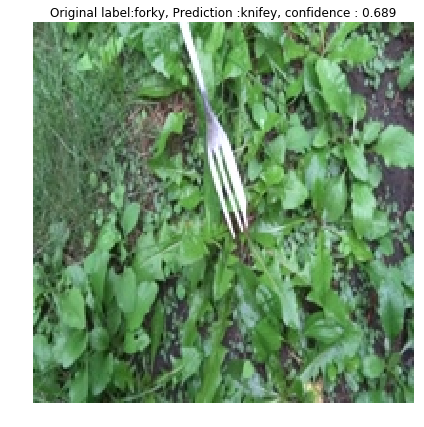

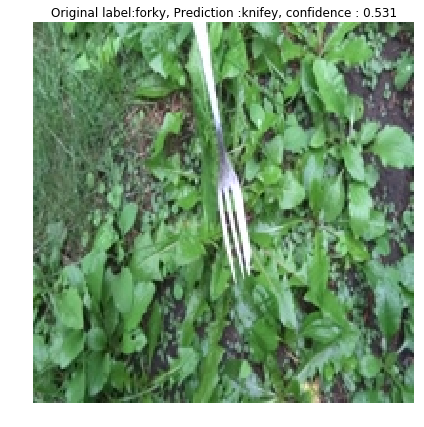

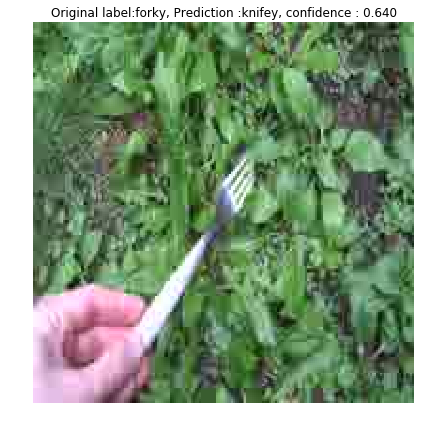

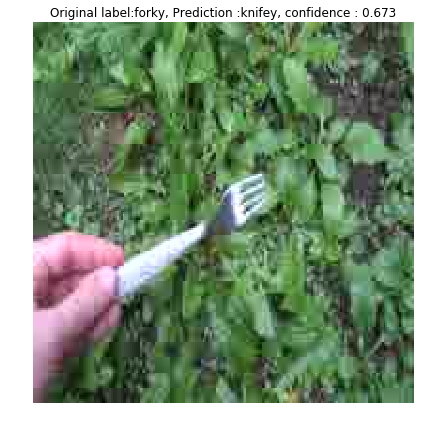

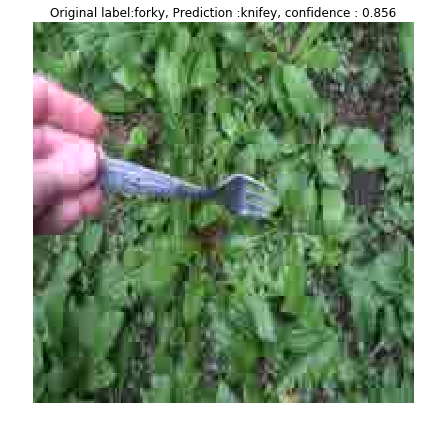

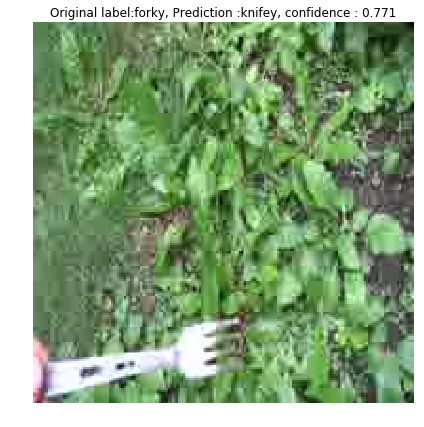

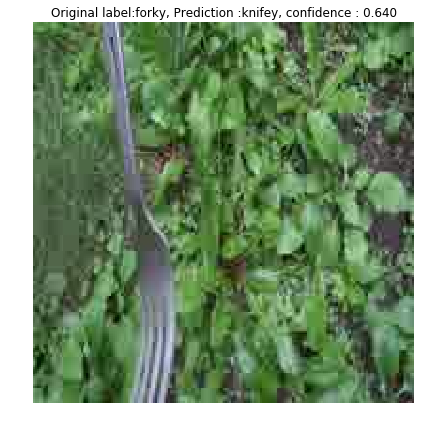

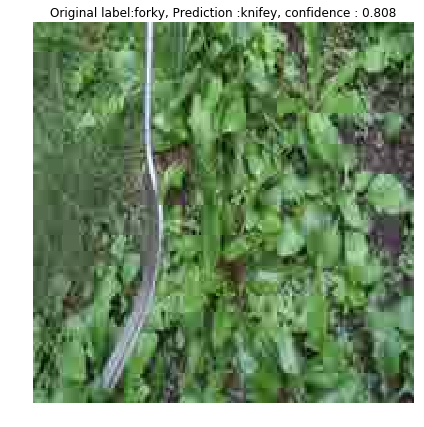

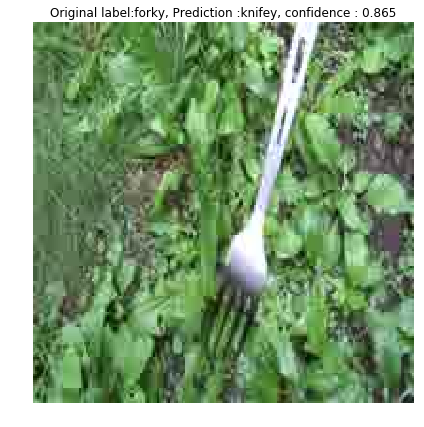

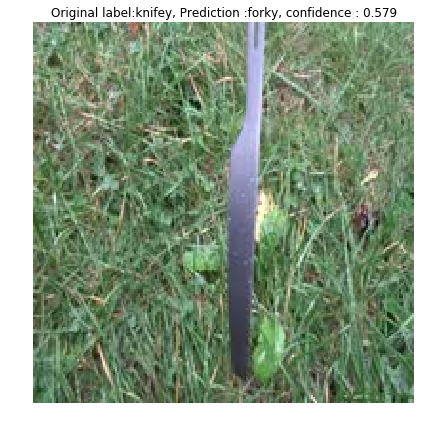

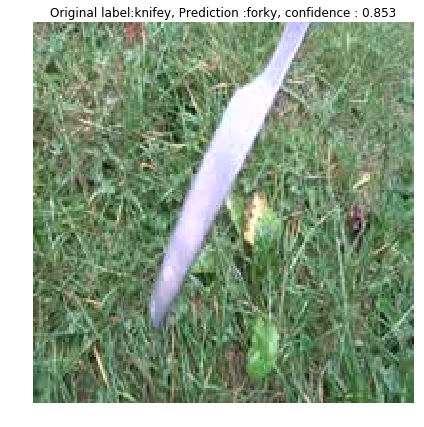

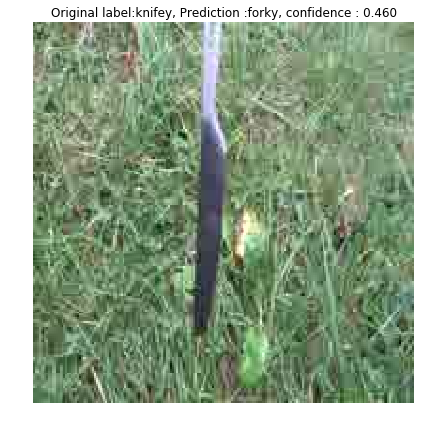

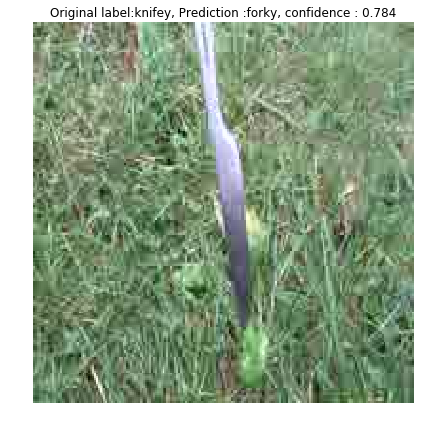

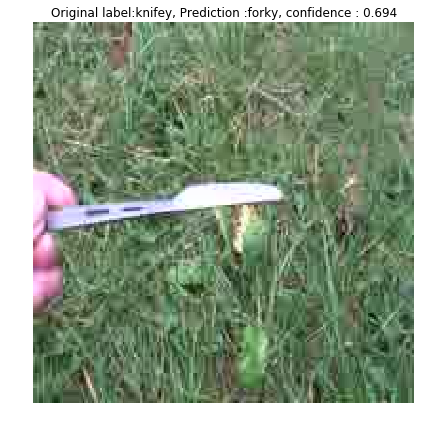

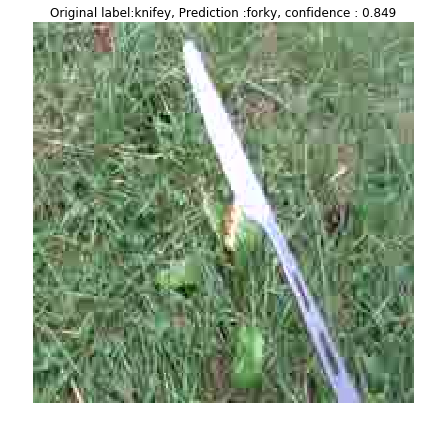

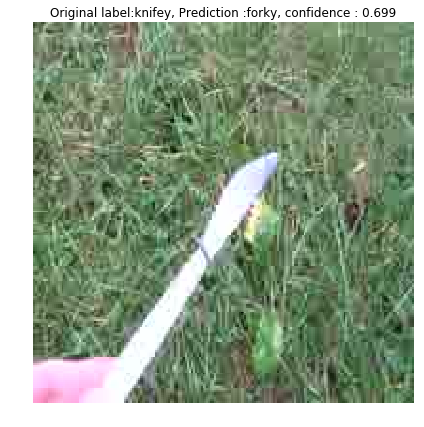

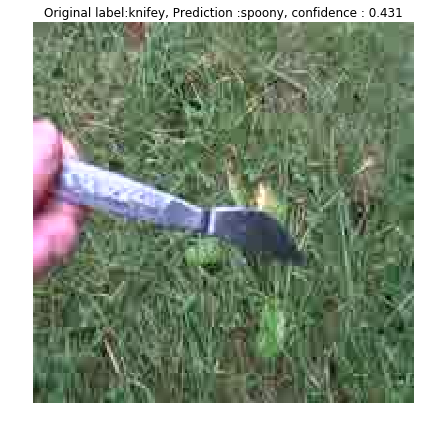

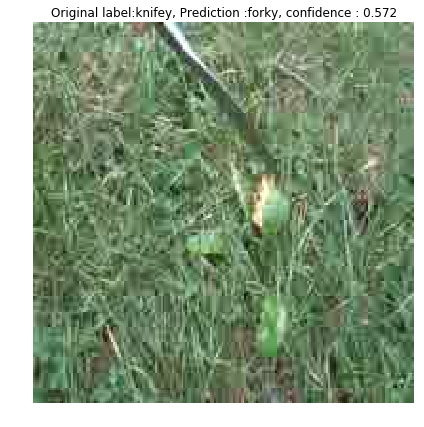

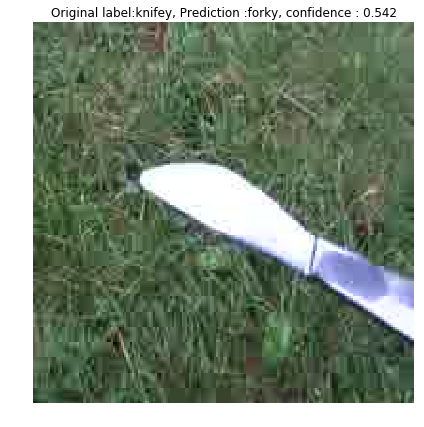

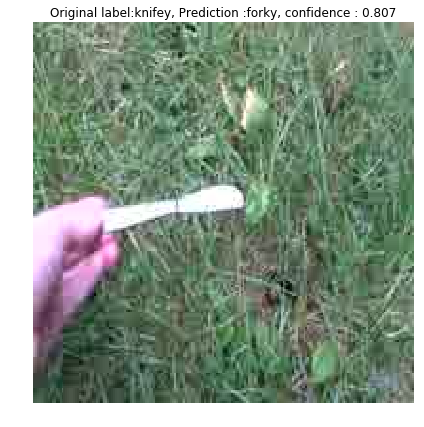

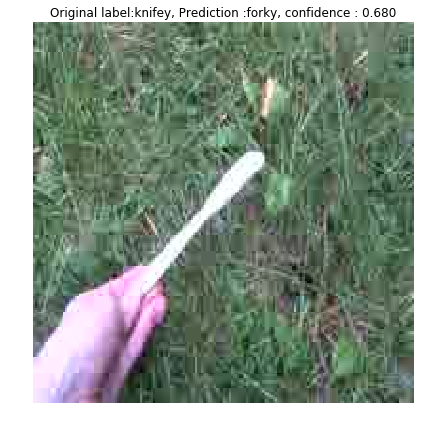

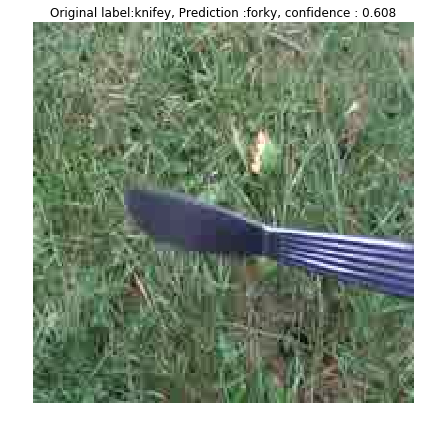

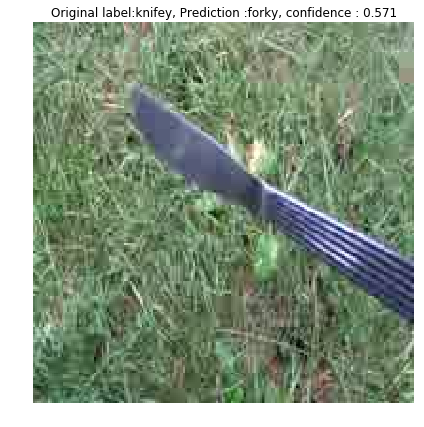

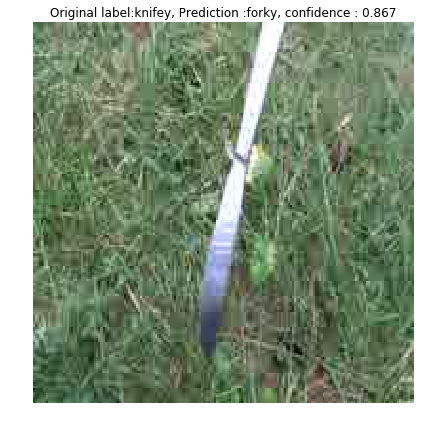

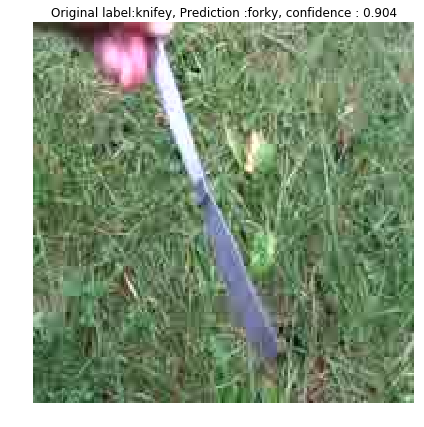

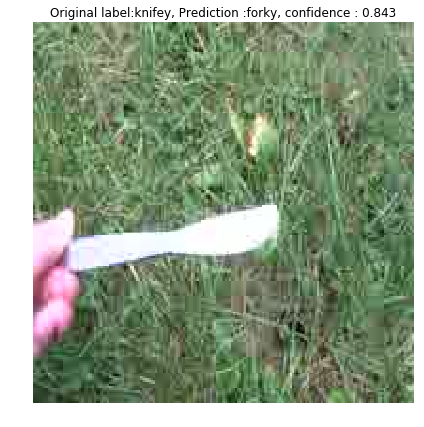

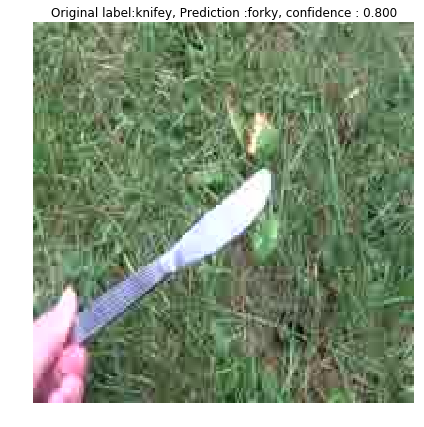

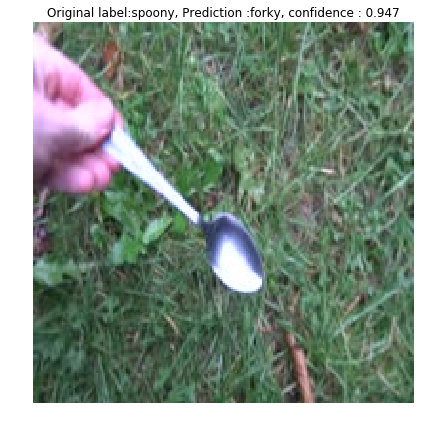

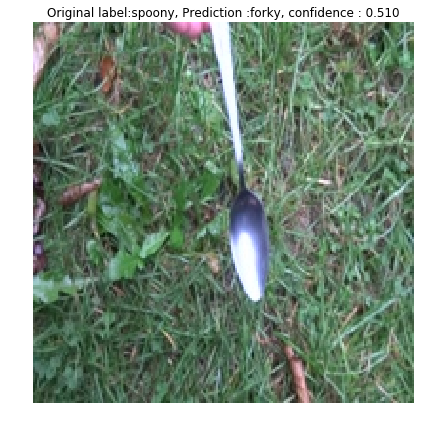

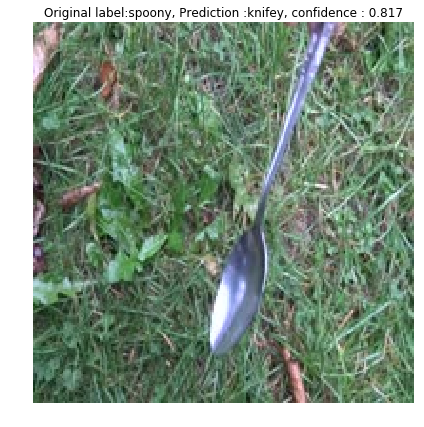

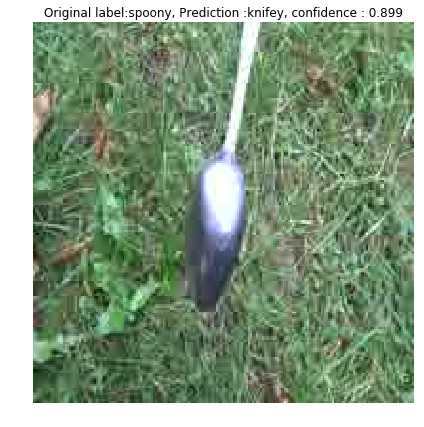

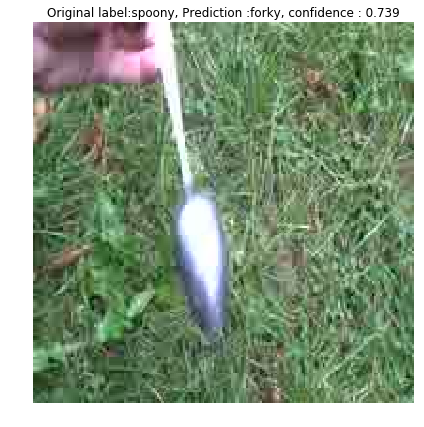

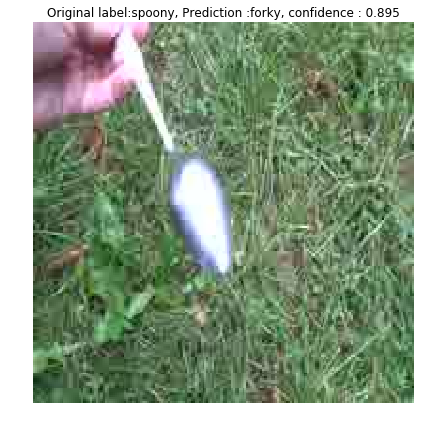

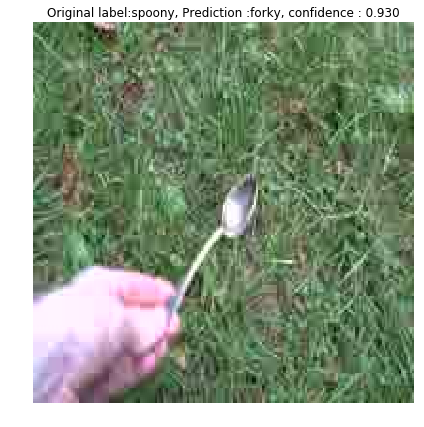

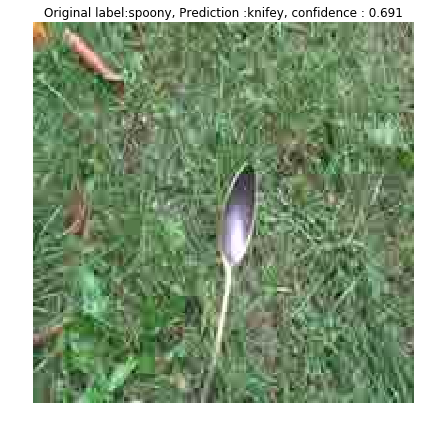

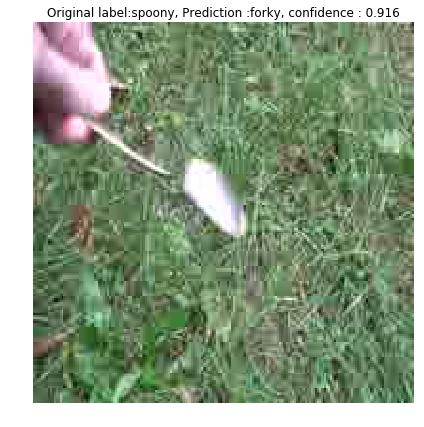

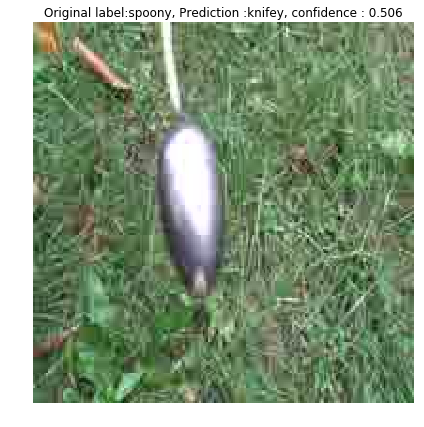

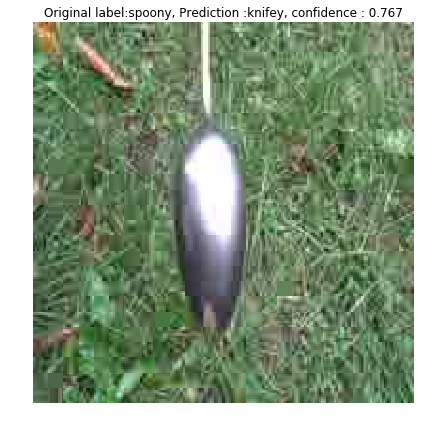

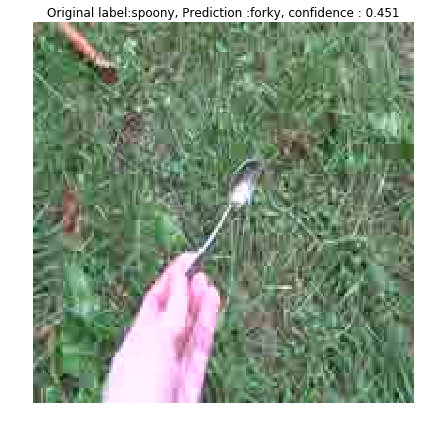

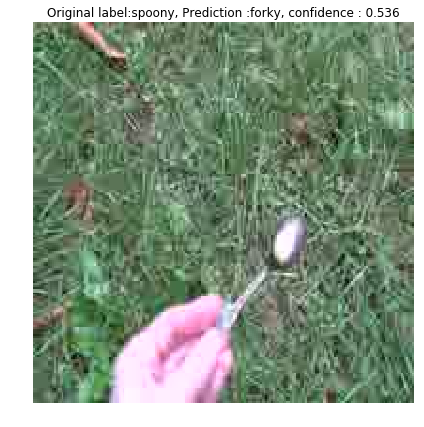

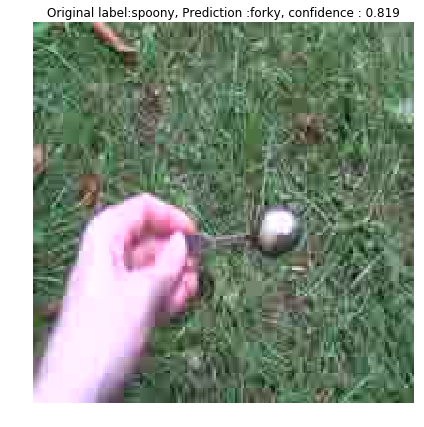

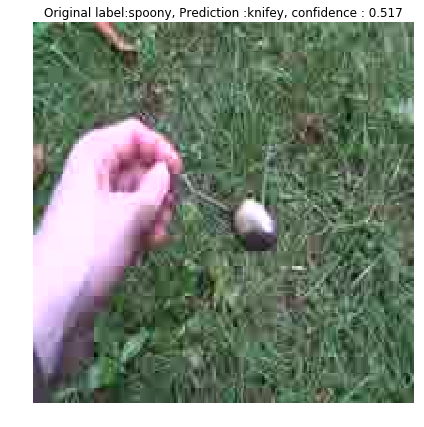

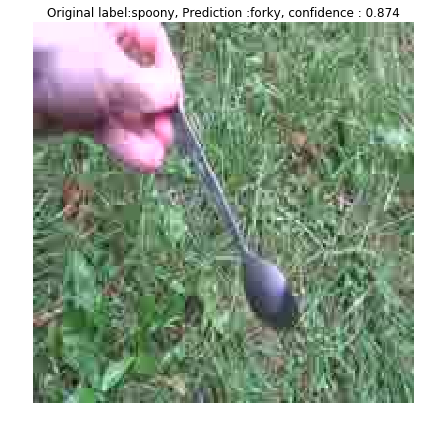

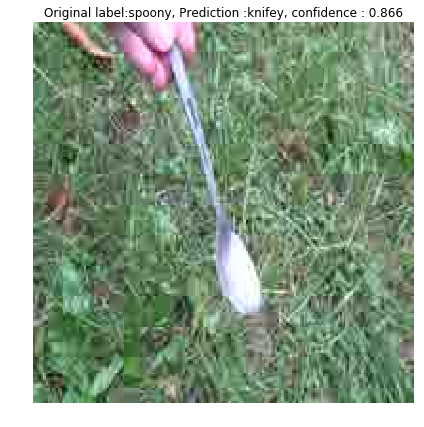

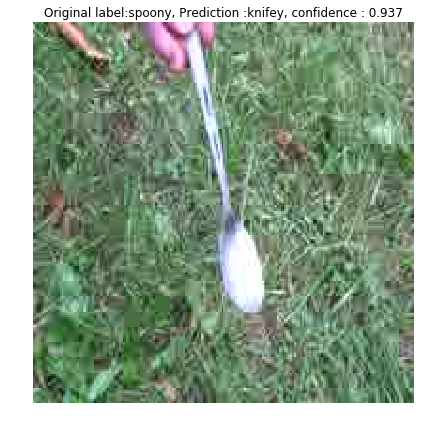

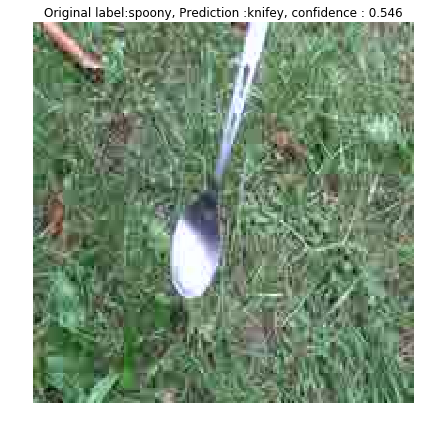

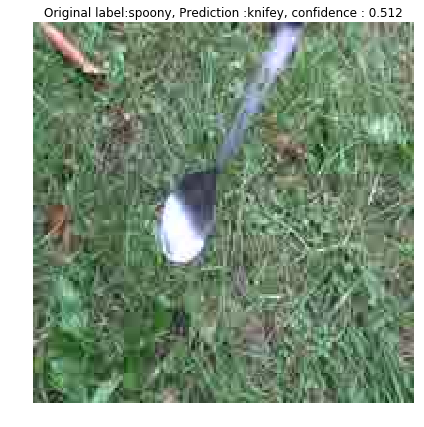

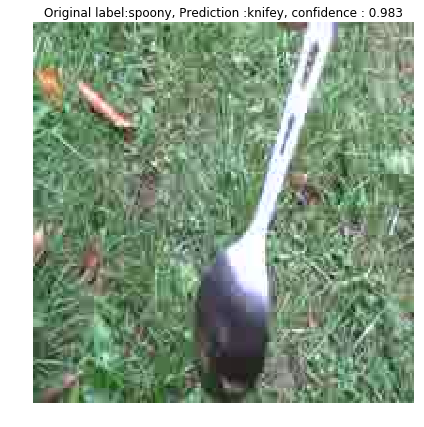

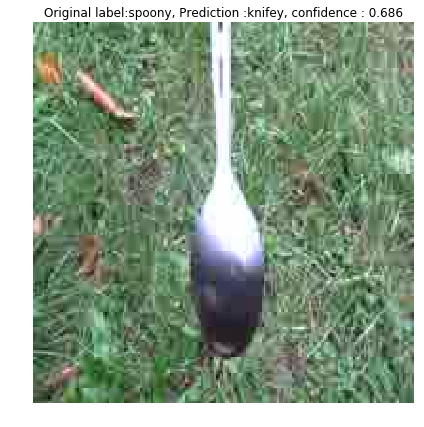

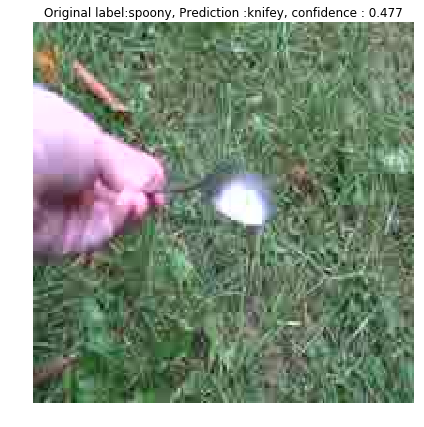

In [13]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

## Experiment 2 : Train Last 4 layers without data augmentation

## Experiment 2
Train the model

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/20
6/6 [==============================] - 3s - loss: 1.6173 - acc: 0.3750 - val_loss: 0.9232 - val_acc: 0.5267
Epoch 2/20
6/6 [==============================] - 2s - loss: 1.3934 - acc: 0.4667 - val_loss: 0.9972 - val_acc: 0.4533
Epoch 3/20
6/6 [==============================] - 2s - loss: 0.7030 - acc: 0.7083 - val_loss: 1.2722 - val_acc: 0.5067
Epoch 4/20
6/6 [==============================] - 2s - loss: 0.6560 - acc: 0.7550 - val_loss: 0.4921 - val_acc: 0.8200
Epoch 5/20
6/6 [==============================] - 2s - loss: 0.2209 - acc: 0.9233 - val_loss: 0.2649 - val_acc: 0.9133
Epoch 6/20
6/6 [==============================] - 2s - loss: 0.2152 - acc: 0.9317 - val_loss: 0.2200 - val_acc: 0.9267
Epoch 7/20
6/6 [==============================] - 2s - loss: 0.0858 - acc: 0.9783 - val_loss: 0.6216 - val_acc: 0.8000
Epoch 8/20
6/6 [==============================] - 2s - loss: 0.2533 - acc: 0.9050 - v

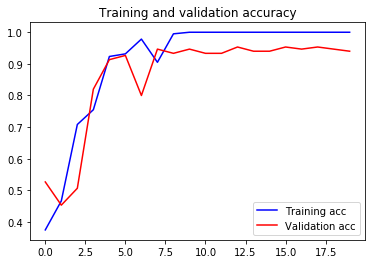

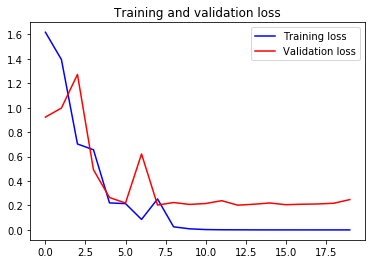

In [7]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('last4_layers.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Experiment 2
Show the errors

Found 150 images belonging to 3 classes.
15/15 [==============================] - 0s     
No of errors = 9/150


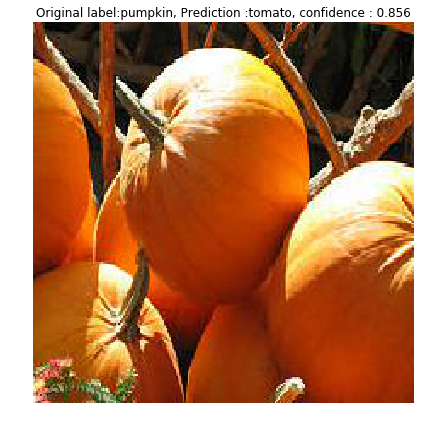

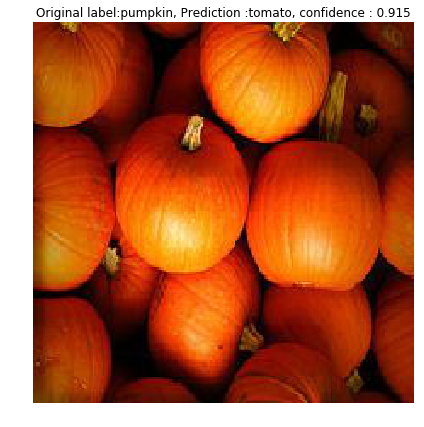

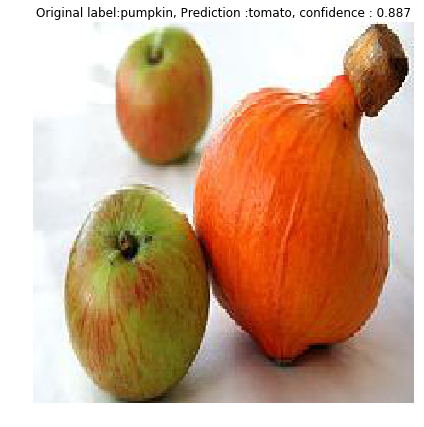

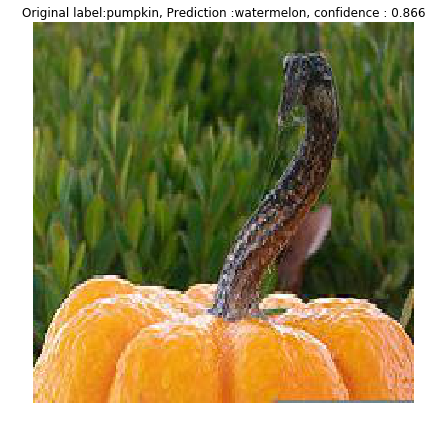

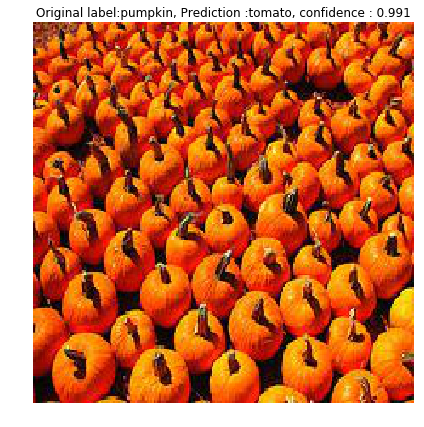

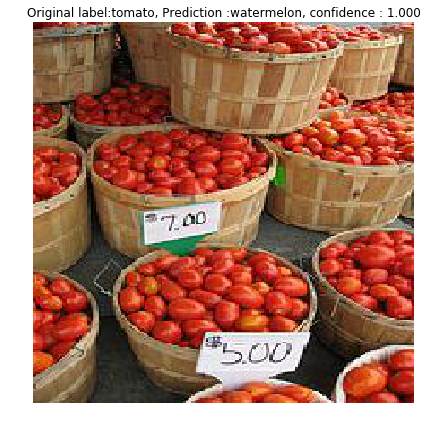

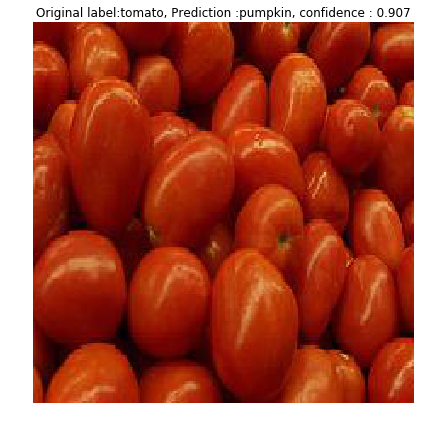

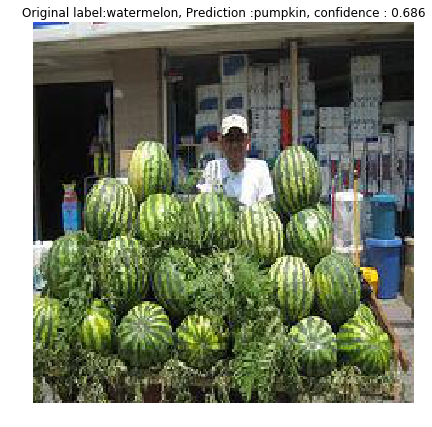

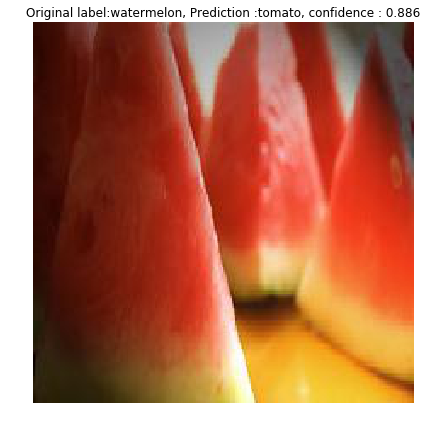

In [8]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

## Experiment 3 : Train last 4 layers with data augmentation


In [12]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.topology.InputLayer object at 0x7f2eec8eeba8> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec8ee320> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec8eed30> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eeb9551d0> False
<keras.layers.convolutional.Conv2D object at 0x7f2eeb8f9dd8> False
<keras.layers.convolutional.Conv2D object at 0x7f2eec5e3a58> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eeb906b00> False
<keras.layers.convolutional.Conv2D object at 0x7f2eea3b61d0> False
<keras.layers.convolutional.Conv2D object at 0x7f2eea3b6518> False
<keras.layers.convolutional.Conv2D object at 0x7f2eea3a3b70> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eea3df630> False
<keras.layers.convolutional.Conv2D object at 0x7f2eea3d6a20> False
<keras.layers.convolutional.Conv2D object at 0x7f2eea3d6828> False
<keras.layers.convolutional.Conv2D object at 0x7f2eea25a908> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2eea27bef0> Fa

## Experiment 3
Train the model. Here we will be using the imageDataGenerator for data augmentation.

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/40
24/24 [==============================] - 8s - loss: 1.0960 - acc: 0.5783 - val_loss: 0.3230 - val_acc: 0.9200
Epoch 2/40
24/24 [==============================] - 7s - loss: 0.4048 - acc: 0.8558 - val_loss: 0.1907 - val_acc: 0.9533
Epoch 3/40
24/24 [==============================] - 8s - loss: 0.1802 - acc: 0.9392 - val_loss: 0.2353 - val_acc: 0.9333
Epoch 4/40
24/24 [==============================] - 7s - loss: 0.1277 - acc: 0.9517 - val_loss: 0.1922 - val_acc: 0.9667
Epoch 5/40
24/24 [==============================] - 8s - loss: 0.1963 - acc: 0.9417 - val_loss: 0.1390 - val_acc: 0.9800
Epoch 6/40
24/24 [==============================] - 7s - loss: 0.0414 - acc: 0.9908 - val_loss: 0.3272 - val_acc: 0.9533
Epoch 7/40
24/24 [==============================] - 7s - loss: 0.1018 - acc: 0.9717 - val_loss: 0.1854 - val_acc: 0.9733
Epoch 8/40
24/24 [==============================] - 7s - loss: 0.0733 -

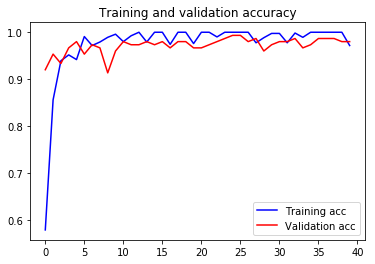

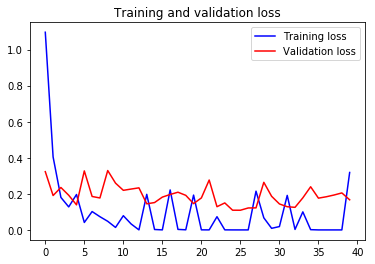

In [13]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 50
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
# NOTE that we have multiplied the steps_per_epoch by 2. This is because we are using data augmentation.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2*train_generator.samples/train_generator.batch_size ,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('da_last4_layers.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Experiment 3
Show the errors

Found 150 images belonging to 3 classes.
15/15 [==============================] - 0s     
No of errors = 3/150


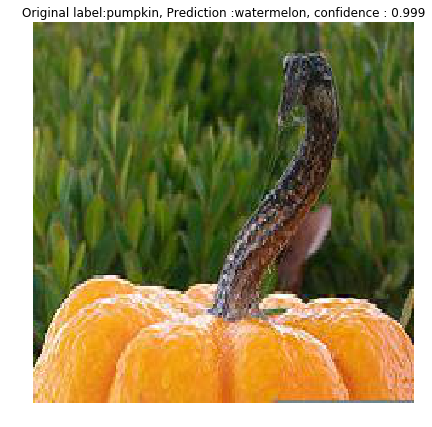

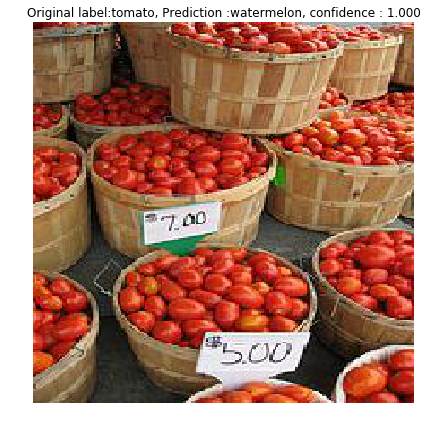

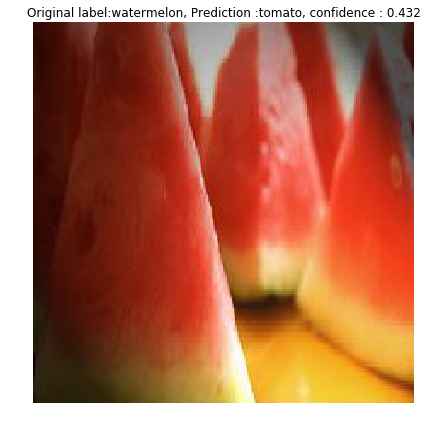

In [14]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()